In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv("data/heart.csv")
o2s = pd.read_csv("data/o2Saturation.csv")

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
o2s.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.corr(method="pearson")

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [8]:
sns.set_palette("Set2")

[Text(0.5, 0, '1=>Male, 0=>Female'),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 1.0, 'Gender Ratio')]

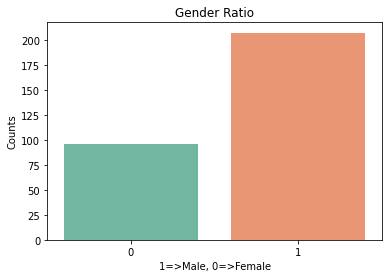

In [9]:
ax=sns.countplot(x='sex', data=data)
ax.set(xlabel='1=>Male, 0=>Female',ylabel='Counts',title='Gender Ratio')

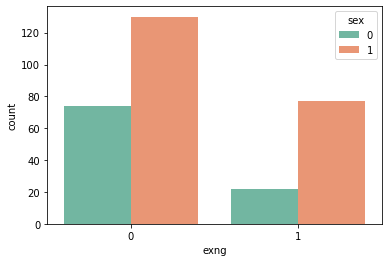

In [10]:
ax=sns.countplot(x='exng',hue='sex',data=data)

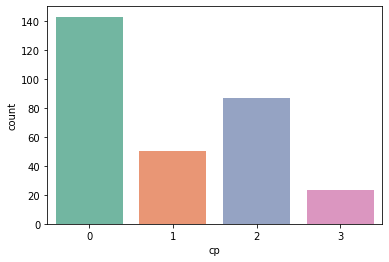

In [11]:
ax=sns.countplot(x='cp', data=data)

[Text(0.5, 1.0, 'How cholesterol affects chest pain type')]

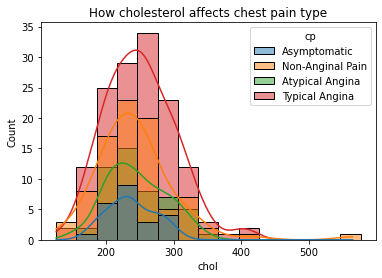

In [9]:
data = data.replace({'cp': {0:'Typical Angina' ,1:'Atypical Angina',2:'Non-Anginal Pain',3:'Asymptomatic'}})

ax=sns.histplot(data=data, x="chol", bins=5,binwidth=30, kde=True,hue='cp')
ax.set(title='How cholesterol affects chest pain type')

<AxesSubplot:xlabel='age', ylabel='chol'>

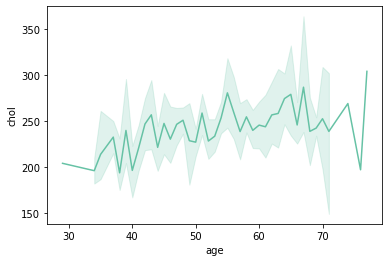

In [13]:
sns.lineplot(data=data,x='age',y='chol')

<AxesSubplot:xlabel='caa', ylabel='output'>

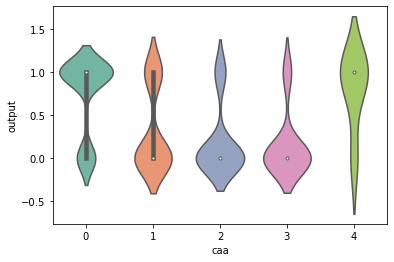

In [14]:
sns.violinplot(x='caa',y='output', data =data)

<AxesSubplot:xlabel='fbs', ylabel='trtbps'>

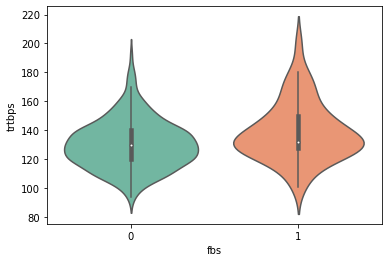

In [15]:
sns.violinplot(x='fbs',y='trtbps', data =data)

<AxesSubplot:xlabel='output', ylabel='thalachh'>

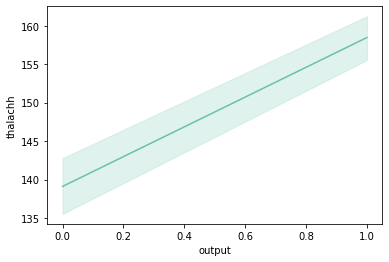

In [16]:
sns.lineplot(y='thalachh',x='output', data=data)

In [4]:
from sklearn.model_selection import train_test_split
#import autosklearn.classification as cls

In [15]:
train_data = data.drop(['output'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(train_data, data['output'], random_state=0)

In [11]:
set(data["cp"])

{'Asymptomatic', 'Atypical Angina', 'Non-Anginal Pain', 'Typical Angina'}

In [12]:
data["cp"].replace({
    'Asymptomatic':0,
    'Atypical Angina':1,
    'Non-Anginal Pain':2,
    'Typical Angina':3
    }, inplace=True)

In [13]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,0,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,3,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
data["cp"] = data["cp"].astype('int64')

In [12]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [37]:
automl = cls.AutoSklearnClassifier(time_left_for_this_task=180, per_run_time_limit=40)
automl.fit(X_train, y_train)

AutoSklearnClassifier(per_run_time_limit=40, time_left_for_this_task=180)

In [38]:
import sklearn.metrics
y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

Accuracy score 0.8421052631578947


In [1]:
import pickle

In [40]:
with open("module/model.pkl", "wb") as file:
    pickle.dump(automl, file=file)

In [2]:
#automl = cls.AutoSklearnClassifier(time_left_for_this_task=180, per_run_time_limit=40)
with open("module/model.pkl", "rb") as file:
    ml = pickle.load(file)

In [30]:
new = np.asarray([[63, 1, 0, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])

print(ml.predict(new))

[1]
